In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle
from experiment.batch_experiment import Batch

In [2]:
batch_name = "batch-2022-02-17-both-0"
time_consistent_batch = Batch(batch_name, "exp_time_consistent")
time_inconsistent_batch = Batch(batch_name, "exp_time_inconsistent")

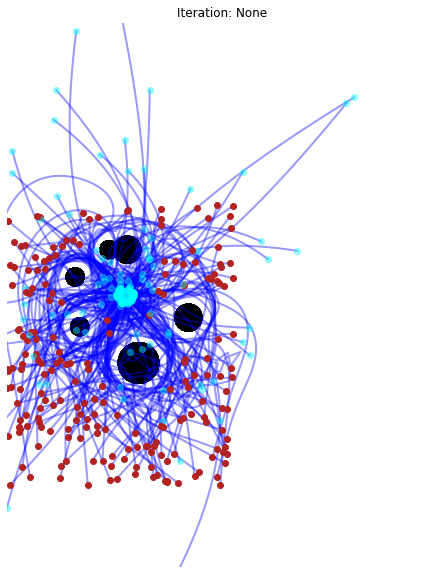

In [3]:
time_consistent_batch.visualize_all_runs()

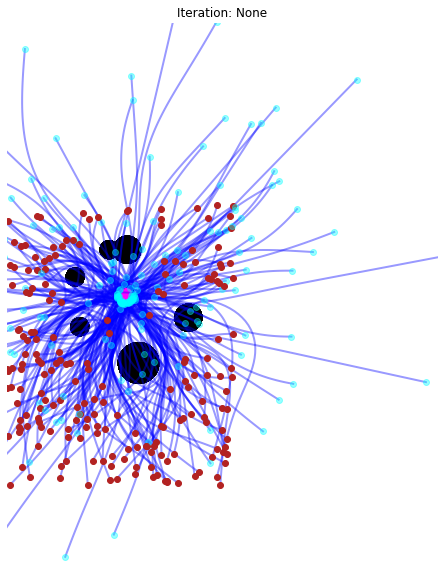

In [4]:
time_inconsistent_batch.visualize_all_runs()

In [5]:
time_consistent_batch.get_statistics()

count    200.000000
mean      80.665000
std       58.364586
min        4.000000
25%       24.750000
50%       53.500000
75%      145.000000
max      145.000000
Name: iteration, dtype: float64

In [6]:
time_consistent_batch.info

{'g_params': [{'car': {'position_indices': [(0, 1)],
    'player_id': 0,
    'collision_r': 1.3591780604468278,
    'car_params': {'wheelbase': 2.413, 'length': 4.267, 'width': 1.988},
    'theta_indices': [2],
    'phi_index': 3,
    'vel_index': 4,
    'obstacles': [(9.0, 25.0),
     (20.0, 35.0),
     (6.5, 50.0),
     (-4.0, 33.0),
     (-5.0, 44.0),
     (2.5, 50.0)],
    'obstacle_radii': [4.5, 3.0, 3.0, 2.0, 2.0, 2.0]}}],
 'l_params': [{'car': {'goals': [(6.0, 40.0)], 'goal_radii': [2.0]}}]}

In [15]:
time_consistent_success_index = time_consistent_batch.data["experiment"][time_consistent_batch.data["is_converged"] == True].index
time_inconsistent_success_index = time_inconsistent_batch.data["experiment"][time_inconsistent_batch.data["is_converged"] == True].index

In [24]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
 
    if (a_set & b_set):
        return a_set & b_set
    else:
        print("No common elements")

In [26]:
common_index = sorted(common_member(time_consistent_success_index, time_inconsistent_success_index))

In [30]:
filtered_time_consistent_data = time_consistent_batch.data.iloc[common_index]
filtered_time_inconsistent_data = time_inconsistent_batch.data.iloc[common_index]

In [32]:
filtered_time_consistent_data["iteration"].describe()

count     73.000000
mean      29.589041
std       19.254030
min        4.000000
25%       17.000000
50%       25.000000
75%       40.000000
max      107.000000
Name: iteration, dtype: float64

In [33]:
filtered_time_inconsistent_data["iteration"].describe()

count     73.000000
mean      54.958904
std       35.232339
min        5.000000
25%       27.000000
50%       45.000000
75%       71.000000
max      145.000000
Name: iteration, dtype: float64

<AxesSubplot:>

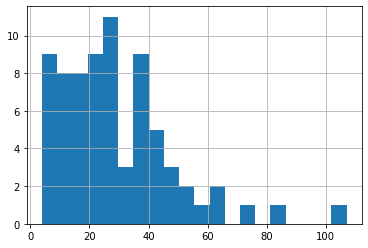

In [35]:
filtered_time_consistent_data["iteration"].hist(bins=20)

<AxesSubplot:>

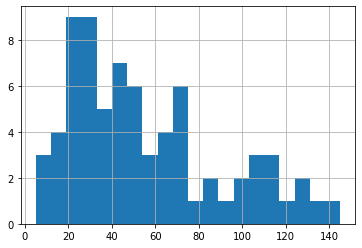

In [37]:
filtered_time_inconsistent_data["iteration"].hist(bins=20)